# Paw Patrol classification training

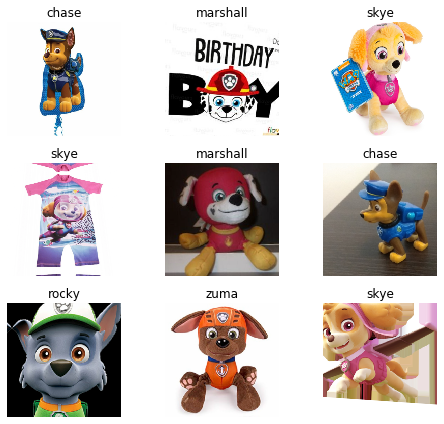

In [26]:
from fastai.vision import *
from fastai.metrics import error_rate

# Load data
np.random.seed(42)
data = ImageDataBunch.from_folder("train", valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=32).normalize(imagenet_stats)
data.show_batch(rows=3, figsize=(7,6))

# Use ResNet34 as the architecture
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [27]:
# Train stage 1
learn.fit_one_cycle(4)
learn.fit_one_cycle(4)
learn.save('stage-1')

epoch,train_loss,valid_loss,error_rate,time
0,2.791263,1.952624,0.684211,03:16
1,1.981460,0.849390,0.280702,03:00
2,1.382526,0.769240,0.210526,03:13
3,1.014371,0.615585,0.140351,03:11
4,0.791067,0.622236,0.140351,03:01
5,0.628531,0.688419,0.140351,02:40
6,0.536752,0.689516,0.157895,02:19
7,0.456736,0.700270,0.175439,02:11


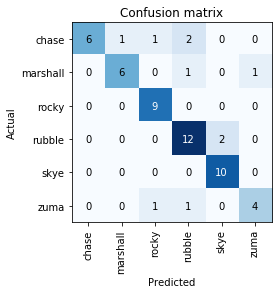

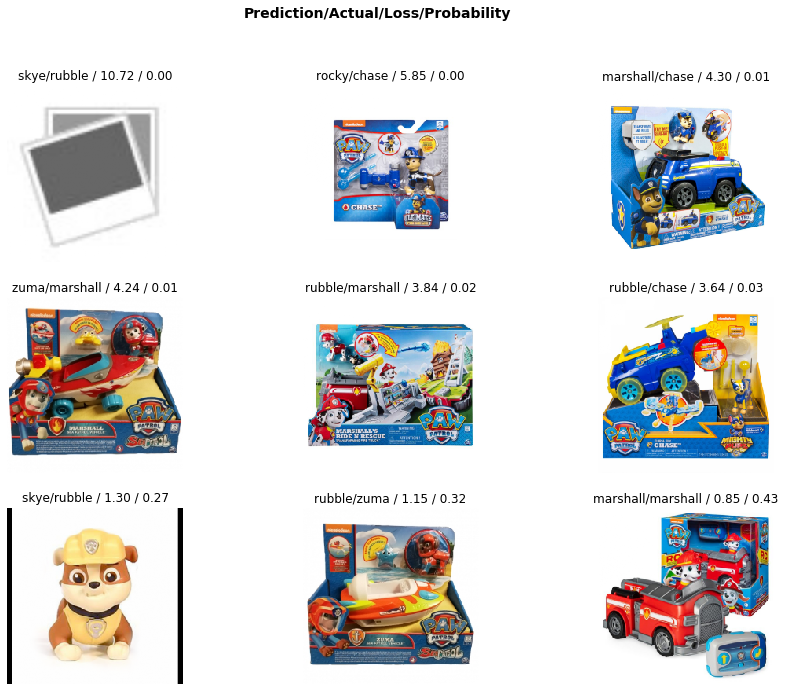

In [28]:
# Show error
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(15,11))

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


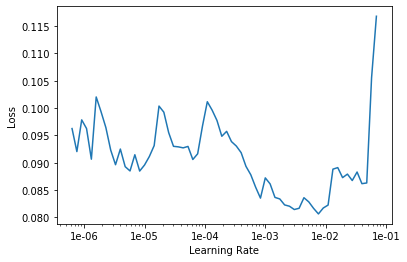

In [29]:
# Run learning rate estimator
learn.lr_find()
learn.recorder.plot()

In [30]:
# Train second pass
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))
learn.save('stage-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.116066,0.676835,0.157895,01:10
1,0.095717,0.663509,0.157895,01:06


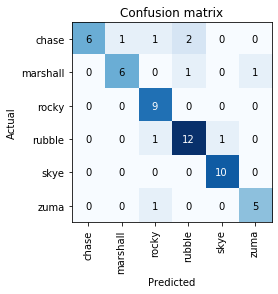

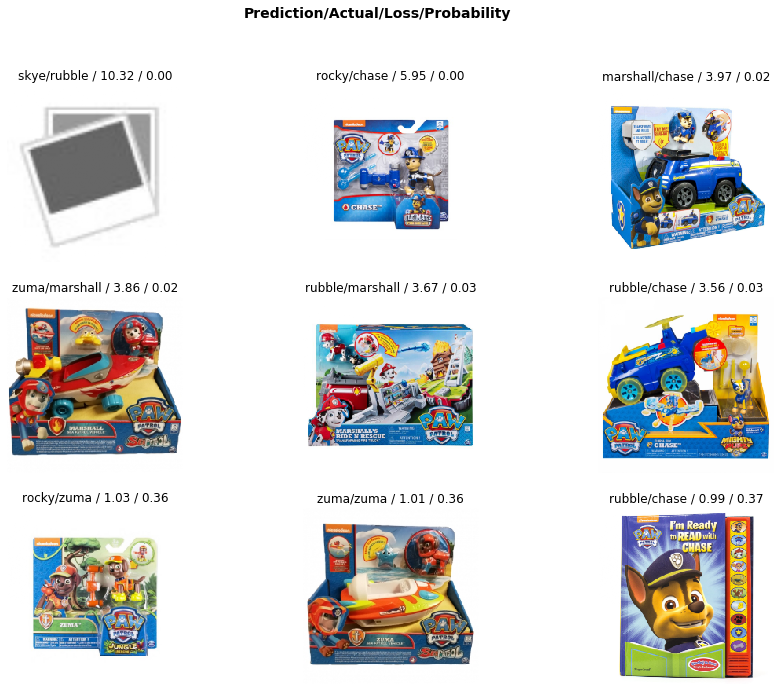

In [31]:
# Show error
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9, figsize=(15,11))